### 1. Data Understanding and Exploration



Let's first have a look at the dataset and understand the size, attribute names etc.

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# reading the CarPrice_Assignment
cars = pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
# summary of the dataset: 205 rows, 26 columns, no null values
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# head
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Understanding the unique value distribution

Here we will check various attributes in a feature and its contribution in the dataset.

In [ ]:
#Check each symboling attribute's count
cars['symboling'].value_counts()


 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

From above output we can see that symboling parameter in cars daraset shows -2 (least risky) to +3 most risky but most of the cars are 0,1,2.


In [ ]:

#Check each aspiration attribute's count
cars['aspiration'].value_counts()


std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
#Check each drivewheel attribute's count
cars['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

drivewheel: frontwheel, rarewheel or four-wheel drive 

Now plot distribution plot for **wheelbase**: distance between centre of front and rarewheels


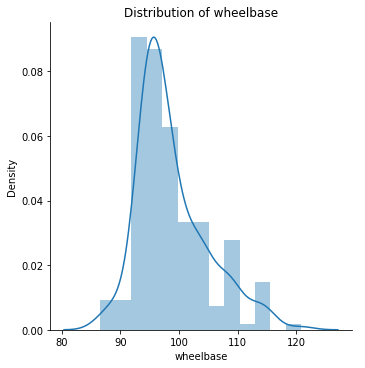

In [ ]:
# plot wheetbase distribution
sns.FacetGrid(cars, size=5) \
   .map(sns.distplot, "wheelbase") \
   .add_legend();
plt.title("Distribution of wheelbase")
plt.show();

plot distribution plot for **curbweight**: weight of car without occupants or baggage


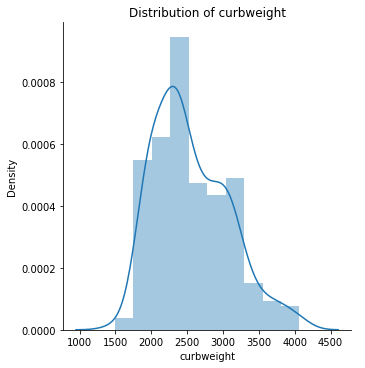

In [ ]:
# plot curbweight distribution
sns.FacetGrid(cars, size=5) \
   .map(sns.distplot, "curbweight") \
   .add_legend();
plt.title("Distribution of curbweight")
plt.show();

plot distribution plot for **stroke**: volume of the engine (the distance traveled by the piston in each cycle)

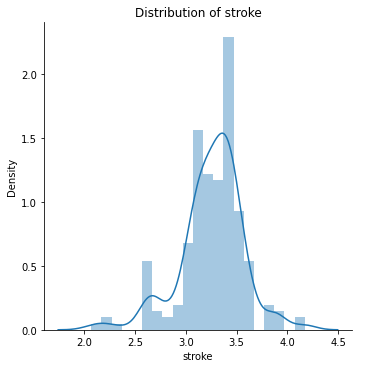

In [ ]:
# plot stroke dsitribution
sns.FacetGrid(cars, size=5) \
   .map(sns.distplot, "stroke") \
   .add_legend();
plt.title("Distribution of stroke")
plt.show();

Now plot distribution plot for **compressionration**: ratio of volume of compression chamber at largest capacity to least capacity

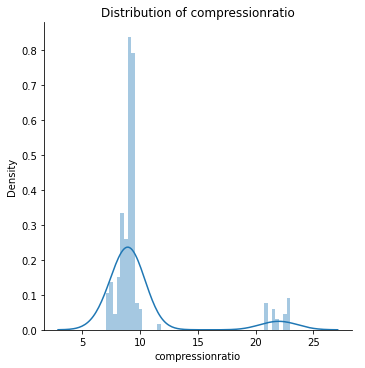

In [ ]:
# plot compressionratio distribution
sns.FacetGrid(cars, size=5) \
   .map(sns.distplot, "compressionratio") \
   .add_legend();
plt.title("Distribution of compressionratio")
plt.show();



Now lets see distribution plot for target variable: **price** of car


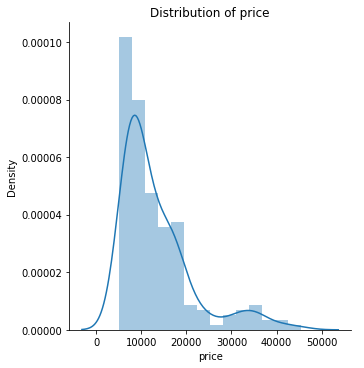

In [ ]:
# Price distribution
sns.FacetGrid(cars, size=5) \
   .map(sns.distplot, "price") \
   .add_legend();
plt.title("Distribution of price")
plt.show();

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [ ]:
# all numeric (float and int) variables in the dataset
numerics = [ 'int64',  'float64']
cars_numeric =  cars.select_dtypes(include=numerics)

#head
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Here, although the variable ```symboling``` is numeric (int), we'd rather treat it as categorical since it has only 6 discrete values. Also, we do not want 'car_ID'.

In [ ]:
# dropping symboling and car_ID 
cars_numeric=cars_numeric.drop(cars_numeric.columns[[1]],axis=1)

cars_numeric.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's now make a pairwise scatter plot and observe linear relationships.

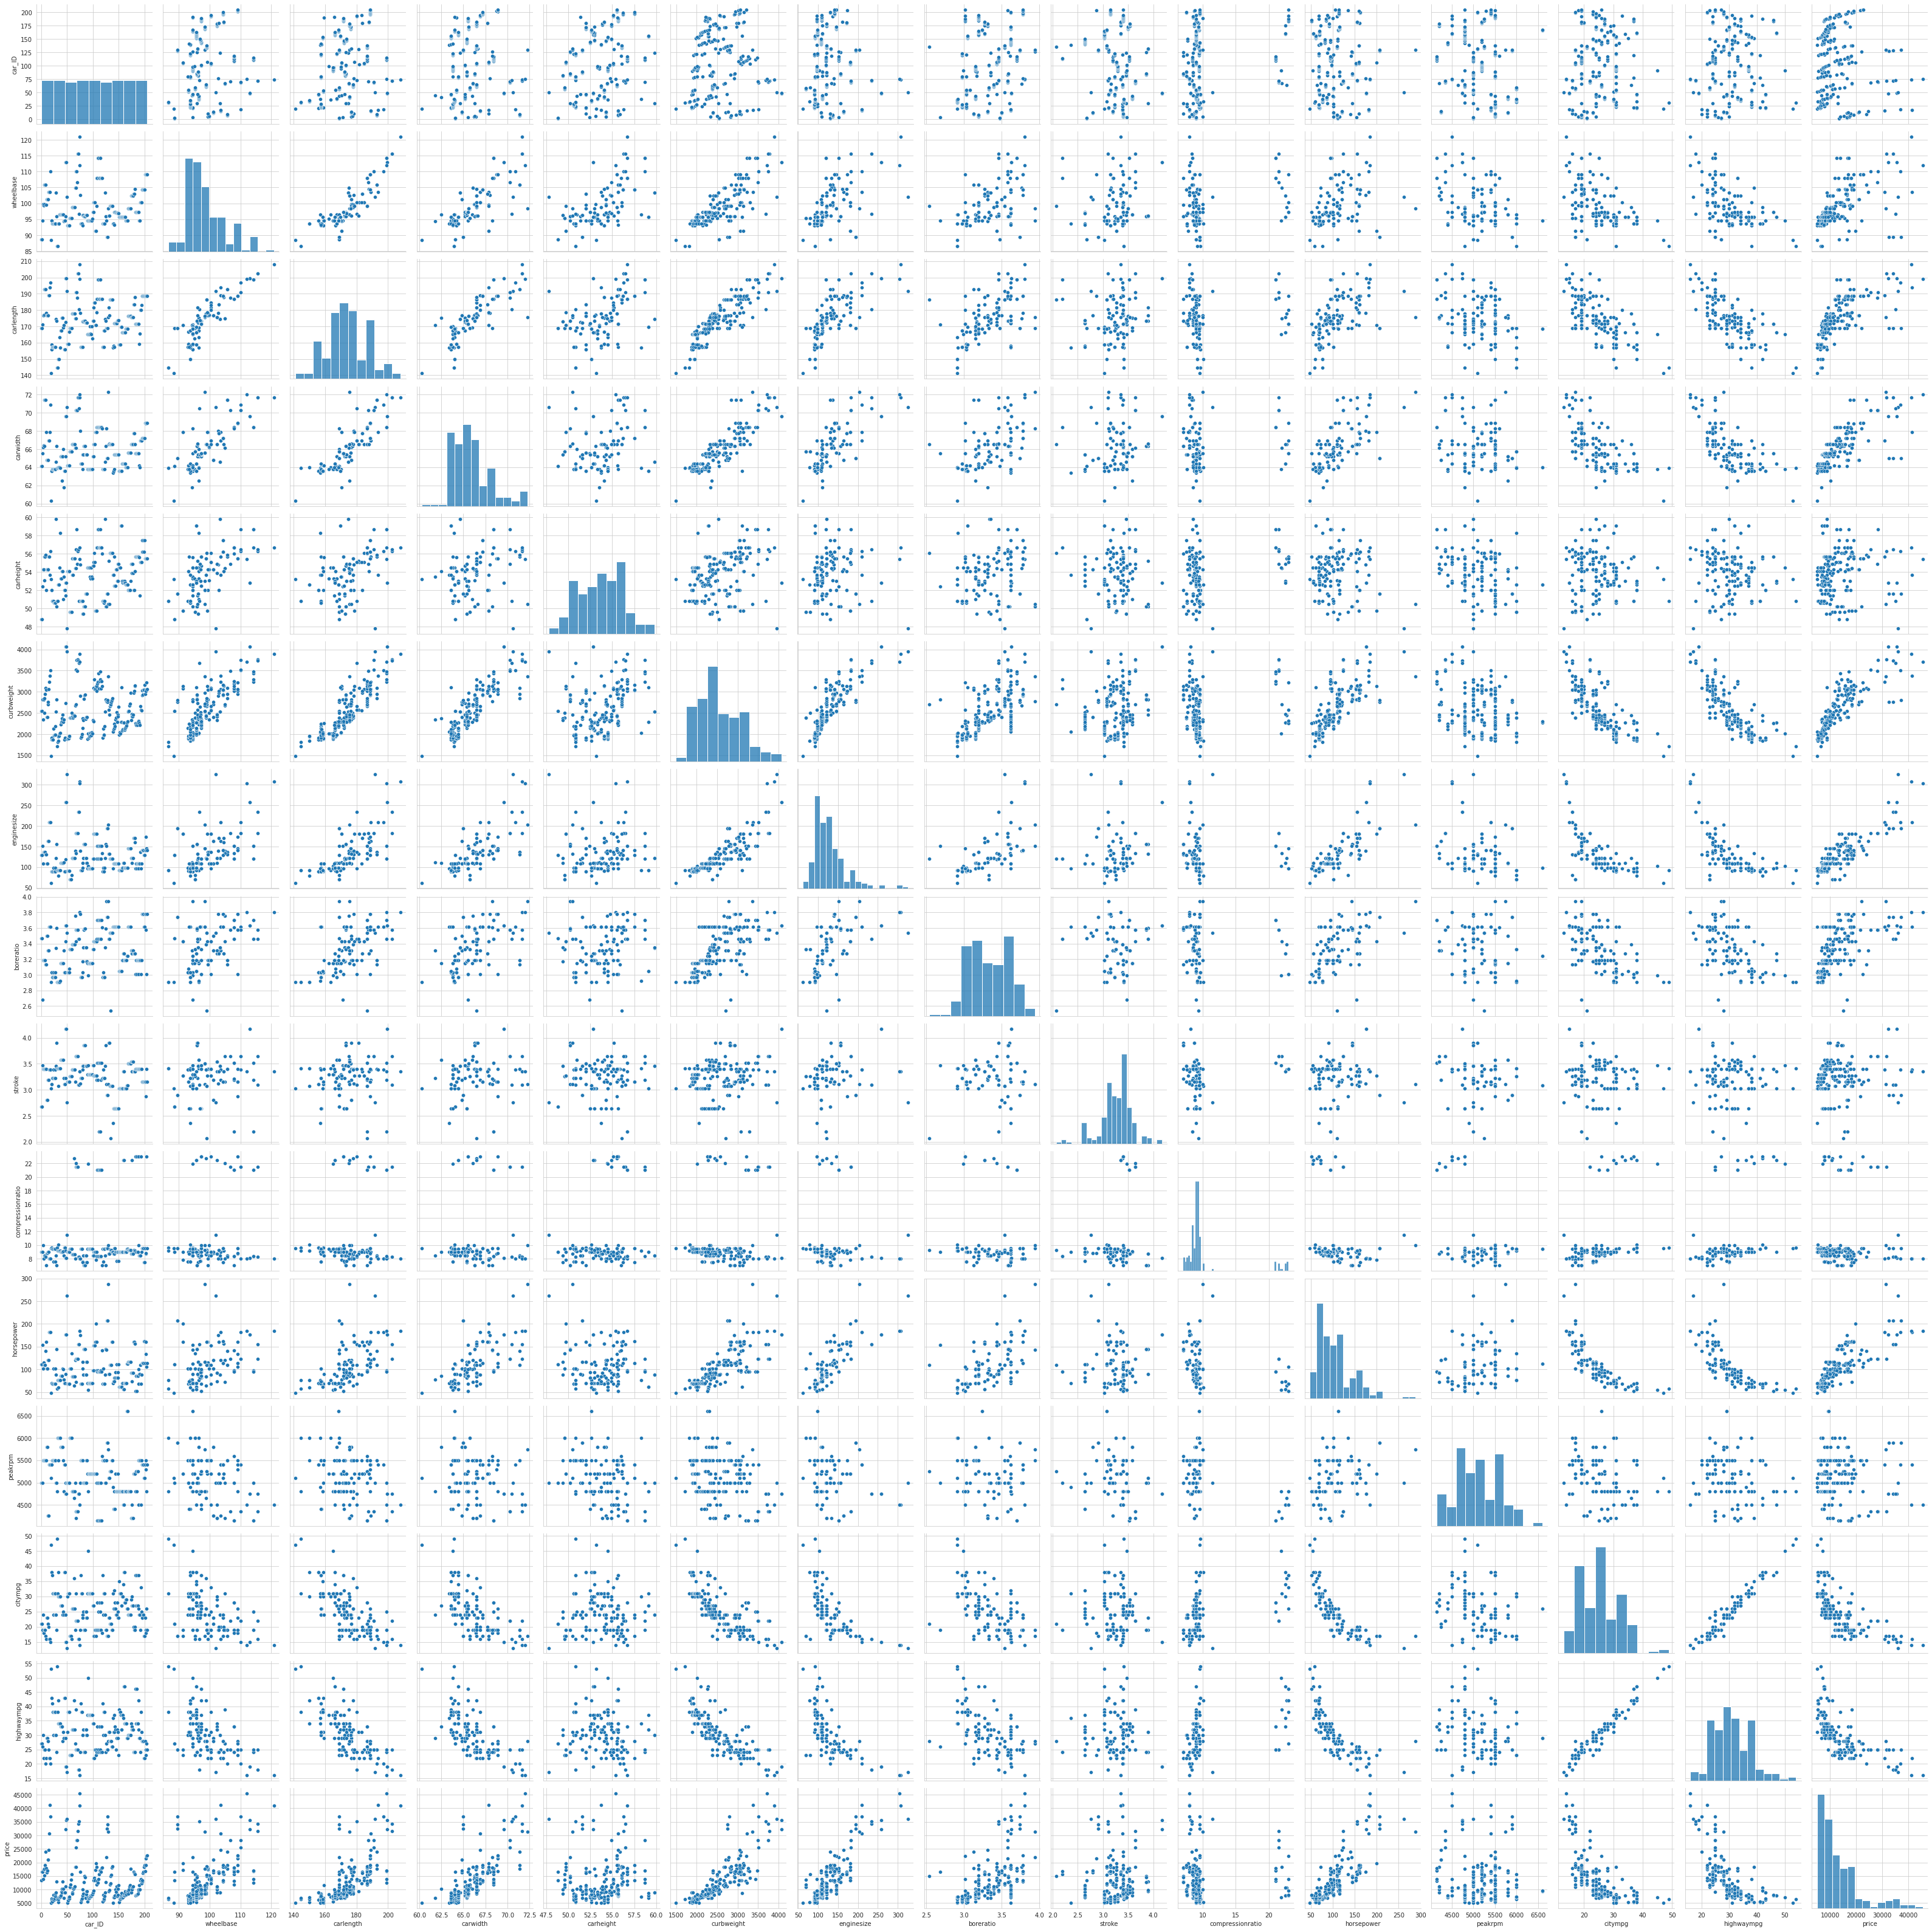

In [ ]:
# paiwise scatter plot for all variables in cars_numeric
plt.close();
sns.set_style("whitegrid")
sns.pairplot(cars_numeric,  palette="bright", height=3)
plt.show()


This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [ ]:
# correlation matrix
cor = cars_numeric.corr()
cor


,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
wheelbase,0.129729,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.150276,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


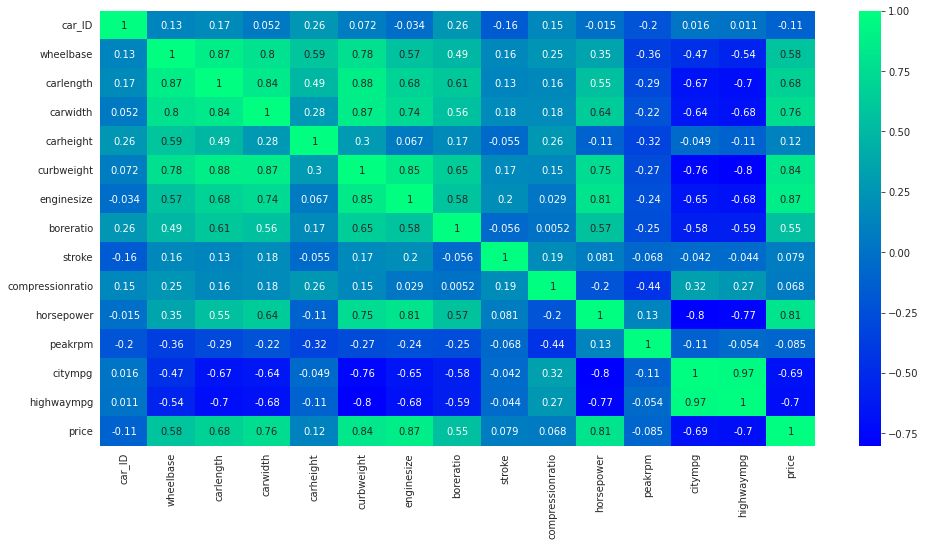

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(cor,annot=True,cmap = 'winter')

plt.show()


## 2. Data Cleaning




Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



In [ ]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# converting symboling to categorical by changing its datatype to object
cars[['symboling']] = cars[['symboling']].astype(object)
#printing cars basic informatiomn
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Next, we need to extract the company name from the column ```CarName```. 

In [ ]:
# CarName: first few entries (upto 30)
cars.CarName.head(30)

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

Notice that the carname is what occurs before a space, e.g. alfa-romero, audi, chevrolet, dodge, bmx etc.

Thus, we need to simply extract the string before a space. There are multiple ways to do that.




In [ ]:
carnames= cars['CarName'].apply(lambda x:x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [ ]:
# Extracting carname

# Method 1: str.split() by space
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"car_company",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head(30)

# Print CarName: first few entries (upto 30)



,car_ID,symboling,car_company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [ ]:
cars.shape

(205, 26)

Let's create a new column to store the compnay name and check whether it looks okay.

 **some car-company names are misspelled** - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.




In [ ]:
# replacing misspelled car_company names using loc
cars.car_company = cars.car_company.str.lower()

def replace_name(a,b):
    cars.car_company.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')




In [ ]:
# again print all the values under car_company
cars.car_company.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

The ```car_company``` variable looks okay now. Let's now drop the car name variable.

In [ ]:
# car basic information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   car_company       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# cars statistical discription
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 3. Data Preparation 



#### Data Preparation

Let's now prepare the data and build the model.

split into X and y


In [ ]:
#Define X
X = cars.loc[:, ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','car_company']]

# Define y
y = cars['price']

In [ ]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


### Creating dummy variables for categorical variables


In [ ]:
# subset all categorical variables

cars_categorical =  X.select_dtypes(include=['object'])

# cars_categorical head
cars_categorical.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [ ]:
# convert into dummies

cars_dummies = pd.get_dummies(cars_categorical,
                     drop_first=True)
# cars_dummies head
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X= X.drop(list(cars_categorical.columns),axis=1)

In [ ]:
# concat dummy variables with X
X=pd.concat([X,cars_dummies],axis=1)

## Scaling the features




In [ ]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols= X.columns

# scaling X and converting to Dtaframe
X=pd.DataFrame(scale(X))

#renaming X columns as cols
X.columns = cols

#print columns 
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [ ]:
X.shape

(205, 68)

In [ ]:
y.shape

(205,)

### Splitting into test train




In [ ]:
# split into train and test with train_size=70% and random_state=100
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

# 3. Model Building and Evaluation





## Ridge, Lasso and ElasticNet Regression



## Ridge Regression



In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()


# defining cross validation folds as 5
folds = 5



#### Cross validation and Hyperparameter tuning: GridSearchCV





In [ ]:
# Define GridSearchCV
model_cv= GridSearchCV(estimator = ridge,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,verbose = 1)




       

# fit GridSearchCV() with X_train and y_train
model_cv.fit(x_train,y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
# Save GridSearchCV results into a dataframe 
cv_results =pd.DataFrame(model_cv.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010251,0.002761,0.001828,0.000614,0.0001,{'alpha': 0.0001},-2854.116753,-1413.812300,-1531.761541,-3968.369904,-2566.257557,-2466.863611,937.837752,26,-694.753230,-814.178930,-832.351826,-903.775793,-720.171139,-793.046184,76.452403
1,0.005917,0.004095,0.001462,0.000199,0.001,{'alpha': 0.001},-2846.765330,-1412.112714,-1533.523778,-3944.973694,-2566.383705,-2460.751844,929.782223,25,-695.179504,-813.808050,-831.764642,-903.295166,-719.845373,-792.778547,76.185169
2,0.002391,0.000049,0.001356,0.000020,0.01,{'alpha': 0.01},-2784.176328,-1396.101814,-1548.469470,-3780.266249,-2566.183404,-2415.039453,873.169878,24,-699.262955,-811.621551,-827.106090,-898.841647,-717.550342,-790.876517,73.714558
3,0.003983,0.002226,0.001346,0.000018,0.05,{'alpha': 0.05},-2640.682659,-1355.068116,-1580.736324,-3300.686592,-2548.346565,-2285.104051,719.477783,23,-713.345673,-812.877044,-817.962405,-886.516756,-711.346429,-788.409662,67.335524
4,0.008109,0.001008,0.002248,0.001438,0.1,{'alpha': 0.1},-2563.275484,-1359.228650,-1589.294656,-2966.273419,-2513.340066,-2198.282455,615.981941,22,-721.902772,-815.578758,-811.644501,-878.629933,-708.742470,-787.299687,63.532012


**Note**: The training results depend on the way the train data is splitted in cross validation. Each time you run, the data is splitted randomly and hence you observe minor differences in your answer

#### plotting mean test and train scores with alpha 


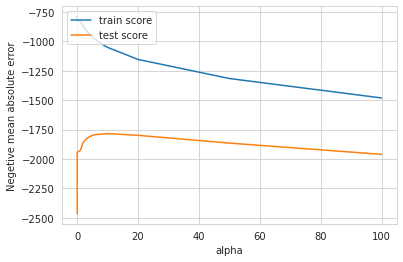

In [ ]:
# change datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negetive mean absolute error')
plt.legend(['train score','test score'],loc='upper left')
plt.show()

In [ ]:
# checking best alpha from model_cv
model_cv.best_params_

{'alpha': 10.0}

As you can see that trai and test scores start to become parallel to each other after apha crosses 10. 
So lets check our ridge model on alpha 10.

In [ ]:
#sel alpha as 10
alpha = 10

# Initialise Ridge() with above alpha
ridge =Ridge(alpha=alpha)

#fit model
ridge.fit(x_train,y_train)
#print ridge coeficients
ridge.coef_

array([ 3.66439600e+02, -3.84733269e+01,  1.48385910e+03, -4.28871390e+02,
        1.32508938e+03,  1.53232524e+03, -1.32353686e+02, -3.43961178e+02,
       -3.85991151e+01,  1.00274451e+03,  4.08530524e+02,  3.06226713e+01,
       -3.86573031e+01,  2.80260386e+02,  2.25689703e+02,  1.15232435e+02,
        3.11172714e+01,  2.20999290e+02, -2.36604555e+02,  4.37146732e+02,
        8.11201095e+01, -4.17761691e+01, -6.36303725e+02, -3.89525755e+02,
       -2.67865922e+02, -2.25694801e+02,  2.17304590e+02,  1.01331104e+03,
       -7.99719800e+01, -2.11299602e+02,  3.80633116e+02,  5.02569921e+01,
       -2.68490049e+01,  1.31276809e+02, -5.38964122e+02, -5.61768987e+02,
       -2.24243763e+02,  3.30958997e+02, -3.41292337e+02,  1.31276809e+02,
        9.03941997e+01, -1.92932138e+02,  2.36604555e+02, -3.32698957e-28,
       -6.35149689e+01, -1.25417650e+02, -3.32698957e-28,  3.66335476e+02,
        1.54082286e+03,  1.04052995e+03, -1.83880719e+02, -4.32144537e+02,
       -3.65503794e+02, -

## Lasso

##### Cross validation and Hyperparameter tuning: GridSearchCV

In [ ]:
# Initialise Lasso()
lasso = Lasso()

# cross validation and Hyperparameter tuning using lasso
#use same attributes used for Ridge tuning except estimator here would be lasso
model_cv=GridSearchCV(estimator = lasso,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,verbose = 1)
#fit model_cv
model_cv.fit(x_train,y_train)



Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
# Save model_cv results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017167,0.007073,0.001391,0.000370,0.0001,{'alpha': 0.0001},-2324.752863,-1442.052401,-1582.911324,-3365.795489,-2332.060832,-2209.514582,685.115001,15,-707.533143,-813.096166,-825.366072,-900.619438,-714.974164,-792.317797,72.696148
1,0.009978,0.001505,0.000981,0.000018,0.001,{'alpha': 0.001},-2325.597811,-1441.914232,-1582.918610,-3365.543227,-2331.902321,-2209.575240,685.082344,16,-707.541145,-813.094508,-825.357146,-900.608340,-714.974339,-792.315096,72.690031
2,0.010677,0.003327,0.000982,0.000116,0.01,{'alpha': 0.01},-2334.050379,-1440.536627,-1582.991423,-3363.022314,-2330.328840,-2210.185916,684.768785,17,-707.632117,-813.079516,-825.273418,-900.497476,-714.975747,-792.291655,72.627018
3,0.009291,0.000110,0.000986,0.000117,0.05,{'alpha': 0.05},-2371.746047,-1434.479193,-1583.311429,-3351.844342,-2323.622243,-2213.000651,683.667517,19,-708.062390,-813.098957,-825.058880,-900.011123,-715.024017,-792.251073,72.353255
4,0.009149,0.000238,0.000937,0.000047,0.1,{'alpha': 0.1},-2419.028230,-1426.999122,-1583.704217,-3337.915603,-2315.839602,-2216.697355,682.964265,20,-708.611287,-813.186719,-824.854499,-899.429607,-715.099045,-792.236231,72.023011


**Note**: The training results depend on the way the train data is splitted in cross validation. Each time you run, the data is splitted randomly and hence you observe minor differences in your answer

#### plotting mean test and train scores with alpha 


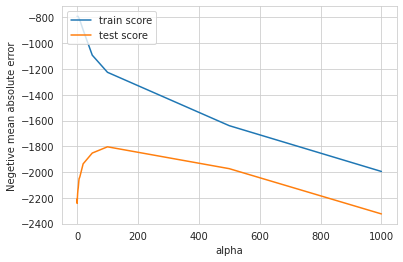

In [ ]:
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negetive mean absolute error')
plt.legend(['train score','test score'],loc='upper left')
plt.show()



In [ ]:
# Checking best  alpha from model_cv
model_cv.best_params_

{'alpha': 100}

As you can see that trai and test scores start to become parallel to each other after apha crosses 100. So lets check our Lasso model on alpha 100.

In [ ]:
# Set alpha =100
alpha =100

# Define lasso with above alpha
lasso =Lasso(alpha=alpha)
  
# fit lasso
lasso.fit(x_train,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# print lasso coeficients
lasso.coef_

array([   0.        ,   -0.        , 1747.1052243 ,  -82.23183774,
       1780.64173078,  788.28807799,   -0.        ,   -0.        ,
          0.        , 1017.48820119,   84.89633333,    0.        ,
         -0.        ,    0.        ,   -0.        ,   -0.        ,
          0.        ,  246.519852  ,  -73.38572878,  120.56790634,
          0.        ,    0.        , -187.60748943,    0.        ,
        -96.25412649, -134.39227325,  294.27227486, 1218.02281069,
          0.        ,   -0.        ,    0.        ,   -0.        ,
         -0.        ,    0.        ,   -0.        , -202.47407284,
         -0.        ,  197.70712322,   -0.        ,    0.        ,
         -0.        ,   -0.        ,   58.81424436,   -0.        ,
          0.        ,   -0.        ,   -0.        ,  186.35685239,
       1805.30123983, 1210.72936345,    0.        ,   -0.        ,
         -0.        ,   78.54297249,  796.29612837,    0.        ,
         -0.        , -397.80411254,  -58.198149  , -377.78256

# ElasticNet Regression

##### Cross validation and Hyperparameter tuning: GridSearchCV

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialise ElasticNet()
elasticnet = ElasticNet()

# cross validation and Hyperparameter tuning using ElasticNet
#use same attributes used for Ridge tuning except estimator here would be ElasticNet
model_cv= GridSearchCV(estimator = elasticnet,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,verbose = 1)  

#fit model_cv
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
# Save model_cv results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013932,0.003647,0.001269,0.000239,0.0001,{'alpha': 0.0001},-2359.306496,-1434.124895,-1585.173856,-3298.333444,-2332.480965,-2201.883931,665.405777,16,-708.667690,-813.310946,-824.108150,-898.619596,-714.471397,-791.835556,71.843790
1,0.008926,0.000152,0.000869,0.000032,0.001,{'alpha': 0.001},-2505.822166,-1382.832314,-1595.115839,-3077.869992,-2346.285330,-2181.585128,619.279364,15,-717.632574,-814.621990,-815.522210,-885.052701,-710.360195,-788.637934,66.125499
2,0.010346,0.000944,0.001026,0.000264,0.01,{'alpha': 0.01},-2424.868597,-1395.195146,-1515.853304,-2454.360493,-2221.395549,-2002.334618,455.221364,13,-746.490044,-836.057183,-828.114972,-882.328791,-735.830461,-805.764290,56.006271
3,0.004730,0.000724,0.000904,0.000074,0.05,{'alpha': 0.05},-2449.469969,-1461.116628,-1485.790820,-1971.671081,-1794.856113,-1832.580922,363.199787,7,-805.971091,-944.298048,-966.005514,-964.250084,-839.664307,-904.037809,67.597974
4,0.004202,0.001375,0.001228,0.000453,0.1,{'alpha': 0.1},-2527.357382,-1494.481558,-1487.737155,-1762.171437,-1703.809701,-1795.111446,382.220472,2,-860.963438,-1026.689720,-1048.698135,-1044.035952,-911.885265,-978.454502,77.197596


#### plotting mean test and train scores with alpha

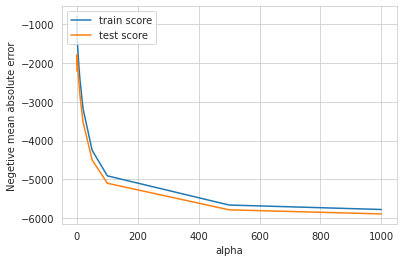

In [ ]:
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negetive mean absolute error')
plt.legend(['train score','test score'],loc='upper left')
plt.show()



In [ ]:
# Checking best  alpha from model_cv
model_cv.best_params_


{'alpha': 0.2}

As you can see that train and test scores start to become parallel to each other after apha crosses 0.2. So lets check our Elastic model on alpha 0.2.

In [ ]:
# Set alpha =0.2
alpha =0.2

# Define ElasticNet with above alpha
elasticnet = ElasticNet(alpha=alpha)
  
# fit elastic net
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.2, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# print ElasticNet coeficients
elasticnet.coef_

array([ 3.52875034e+02,  8.04719724e+01,  1.36197491e+03, -3.45930153e+02,
        1.18273011e+03,  1.35196759e+03, -2.41227489e+01, -2.91628086e+02,
        6.93627991e+00,  9.37481847e+02,  3.32618529e+02, -1.39882008e+01,
       -7.85819335e+01,  2.27493274e+02,  1.72030594e+02,  6.62782224e+01,
       -1.27923967e+01,  2.27565797e+02, -2.14336655e+02,  4.14688503e+02,
        9.90597634e+01,  1.91288777e+01, -5.40401108e+02, -2.83936435e+02,
       -2.27849088e+02, -2.42012667e+02,  2.56159923e+02,  9.31561443e+02,
       -2.60504970e+01, -2.17386627e+02,  3.19978445e+02,  2.58362347e+01,
        1.42903295e-01,  9.85928492e+01, -4.37823888e+02, -5.79072467e+02,
       -1.18311947e+02,  2.97005265e+02, -2.47647701e+02,  9.85847326e+01,
        5.63230424e+01, -1.80422952e+02,  2.14349861e+02, -0.00000000e+00,
       -9.91244238e+00, -1.35054652e+02, -0.00000000e+00,  3.40417804e+02,
        1.47689704e+03,  1.05813935e+03, -1.36588735e+02, -3.58406577e+02,
       -2.90372308e+02, -

### Model evaluation



Lets compare all three model result using error term . Here we will check RMSE.



In [ ]:
# Calculate all 3 predictions 
pred_l = lasso.predict(x_test)
pred_r = ridge.predict(x_test)
pred_en = elasticnet.predict(x_test)

In [ ]:
# import mean_squared_error module
from sklearn.metrics import mean_squared_error

# print RMSE for all 3 techniques
print('lasso RMSE:',np.sqrt(mean_squared_error(y_test,pred_l)))
print('ridge RMSE:',np.sqrt(mean_squared_error(y_test,pred_r)))
print('elasticnet RMSE:',np.sqrt(mean_squared_error(y_test,pred_en)))

lasso RMSE: 2494.7818704236106
ridge RMSE: 2330.424992250486
elasticnet RMSE: 2387.7702869747072


As you can see for our problem statement Ridge as a regularization technique gave us the best result. You can also check for other metrics also, so that you choose the best model.